### Задача 1
Використовуючи дані із файлу student_scores.csv побудуйте модель простої регресії для знаходження залежності між значеннями протяжності навчання і середнього балу студентів. Оцініть якість отриманої регресії.


### Рішення


In [90]:
import pandas as pd
import numpy as np
import sklearn
import openpyxl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [15]:
df=pd.read_csv('student_scores.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


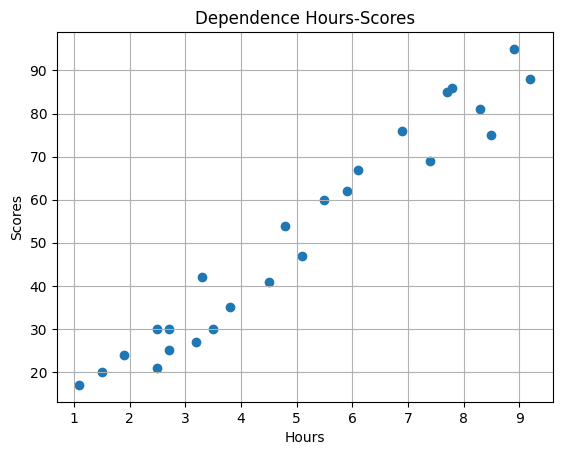

In [98]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()

In [190]:
X=np.array(df[['Hours']])
y=np.array(df[['Scores']])

In [191]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [192]:
print('Функція лінійної регресії має вигляд - Y={:.4f}*X+{:.4f} '.format(model.coef_[0][0],model.intercept_[0]))
print('Достовірність моделі: Score= {:.4f}'.format(model.score(X, y)))

Функція лінійної регресії має вигляд - Y=9.7758*X+2.4837 
Достовірність моделі: Score= 0.9529


##### Відобразимо на графіку отриману функцію лінійної регресії в інтервалі $ X[0,max(x_i)]$

In [193]:
x_aprox=[0,10]
y_aprox=[2.48367341,9.77580339*x_aprox[1]+2.48367341]
x_aprox,y_aprox

([0, 10], [2.48367341, 100.24170731])

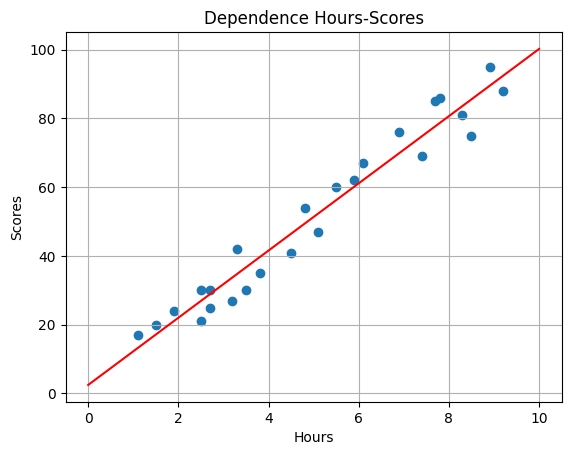

In [194]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()
ax.plot(x_aprox,y_aprox,color='Red')


#### Скористаємося моделью та спрогнозуємо поведінку функції в інтервалі $ X[8,12]$ (відобразимо її зеленим кольором)


In [195]:
x_pred=np.array([[x] for x in range(8,13)])

In [196]:
y_pred=model.predict(x_pred)

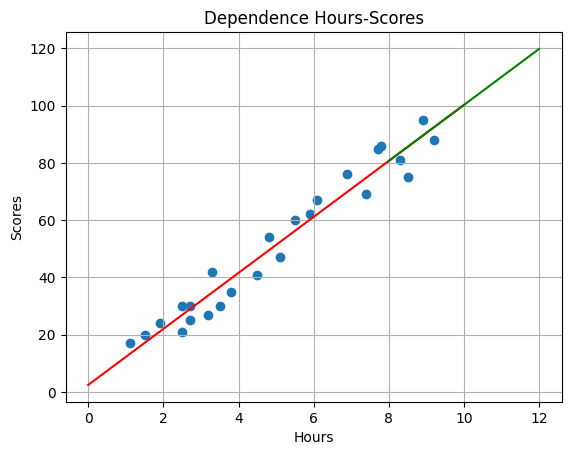

In [197]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()
ax.plot(x_aprox,y_aprox,color='Red')
ax.plot(x_pred,y_pred,color='Green')


#### Знайдемо значення Hours при якому Scores=100 (максимально можлива оцінка) 

$$ y=ax+b => x=\frac{y-b}{a} $$

In [198]:
x_100=(100-2.4837)/9.7758
x_100

9.9752756807627

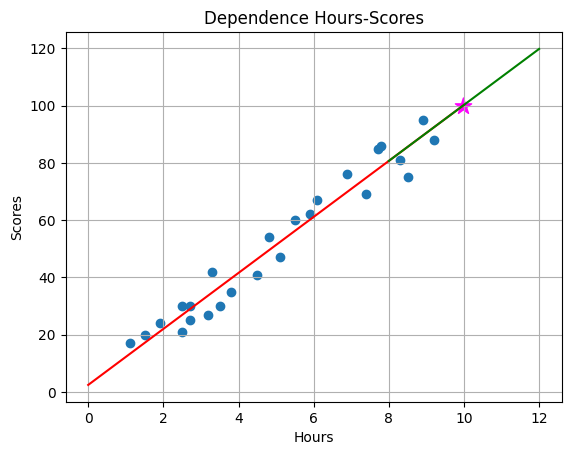

In [199]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set(title = 'Dependence Hours-Scores',
       xlabel = 'Hours',
       ylabel = 'Scores')
ax.scatter(df['Hours'],df['Scores'])
ax.grid()
ax.plot(x_aprox,y_aprox,color='Red')
ax.plot(x_pred,y_pred,color='Green')
ax.scatter(x_100,100,color='Magenta',marker='*', s=150)

### Висновок 
Вчитися більше 10 годин не має сенсу 😊!